**Importing the relevant Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing the data**

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['real_estate.csv']))

Saving real_estate.csv to real_estate.csv


# Data Understanding: 5 marks

In [ ]:
raw_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


we assigned our table to raw_data and used .head() to view the contents of all columns


In [ ]:
raw_data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00
mean,256.50,2013.14,17.59,1059.17,4.13,24.97,121.53,38.07
std,147.95,0.28,11.45,1235.36,2.94,0.01,0.01,13.23
min,1.00,2012.67,0.00,23.38,0.00,24.93,121.47,7.60
25%,128.75,2012.92,8.80,289.32,1.00,24.96,121.53,28.40
50%,256.50,2013.17,16.15,490.11,4.00,24.97,121.54,38.55
75%,384.25,2013.42,27.50,1451.24,6.00,24.98,121.54,46.25
max,512.00,2013.58,43.80,6488.02,10.00,25.01,121.57,117.50


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is explained below.

In the above workspace, on the left hand side we cna see variables like count, mean, std min and so on. Count represents the total number of data in each column of the dataset, we can see 512 in all of them which means that we have 512 rows of data. Similarly mean gives the mean value of each column, std gives the standard deviation of each column, min gives the lowest value of that column, 25%, 50%, and 75% give the values of Q1, Q2 and Q3 respectively and max gives the maximum value of each column.

In [ ]:
raw_data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.00,-0.05,-0.04,-0.04,0.01,-0.02,0.01,-0.01
X1 transaction date,-0.05,1.00,0.02,0.10,-0.01,0.02,-0.09,0.05
X2 house age,-0.04,0.02,1.00,0.02,0.05,0.08,-0.04,-0.18
X3 distance to the nearest MRT station,-0.04,0.10,0.02,1.00,-0.60,-0.60,-0.80,-0.68
X4 number of convenience stores,0.01,-0.01,0.05,-0.60,1.00,0.45,0.45,0.57
X5 latitude,-0.02,0.02,0.08,-0.60,0.45,1.00,0.41,0.53
X6 longitude,0.01,-0.09,-0.04,-0.80,0.45,0.41,1.00,0.53
Y house price of unit area,-0.01,0.05,-0.18,-0.68,0.57,0.53,0.53,1.00


As we can see in the above table, the value for correlation of each column element with each other and we can see that variables like transaction date, number of convinience stores, latitude, longitude have positive correlation with our target data meaning that if the value of these variable increase the price of the house also increases. And house age and distance to the nearest MRT station have negative correlation with our target data meaning that the increase in value of these variables cause deacrease in price of the house.

**Copy the data**

In [ ]:
data = raw_data.copy()

copying the data from main data in order to use it by modifying it for further process

# Data Analysis and Cleaning : 5+5 marks

I cleaned the data as I was analysing it to make it easier for me.

**Dropping the unused column**

In [ ]:
data = data.drop(['No'],axis=1)

In the above dataset no. is used just for indexing so we don't use it as a parameter for analyzing our results. Due to which we drop it.

**Descriptive summary of the data**

In [ ]:
data.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2013.144719,17.585156,1059.170516,4.132812,24.968899,121.533492,38.071484
std,0.281480,11.450842,1235.360319,2.938032,0.012401,0.014982,13.226052
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,8.800000,289.324800,1.000000,24.962990,121.529728,28.400000
50%,2013.167000,16.150000,490.113350,4.000000,24.971100,121.538630,38.550000
75%,2013.417000,27.500000,1451.241000,6.000000,24.977582,121.543100,46.250000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is explained below.

In the above workspace, on the left hand side we cna see variables like count, mean, std min and so on. Count represents the total number of data in each column of the dataset, we can see 512 in all of them which means that we have 512 rows of data. Similarly mean gives the mean value of each column, std gives the standard deviation of each column, min gives the lowest value of that column, 25%, 50%, and 75% give the values of Q1, Q2 and Q3 respectively and max gives the maximum value of each column.

we assigned our table to raw_data and used .head() to view the contents of all columns


**Declaring the Independent and Dependent variable**

In [ ]:
y = data["Y house price of unit area"]
x1 = data[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude']]

**Declaring the constant and fit the model**

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.562
Model:                                    OLS   Adj. R-squared:                  0.558
Method:                         Least Squares   F-statistic:                     129.9
Date:                        Mon, 14 Feb 2022   Prob (F-statistic):           2.36e-88
Time:                                07:10:43   Log-Likelihood:                -1836.7
No. Observations:                         512   AIC:                             3685.
Df Residuals:                             506   BIC:                             3711.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.388e+04   2898.874     -4.788      0.000   -1.96e+04   -8183.330
X1 transaction date                        4.5546      1.397      3.260      0.001       1.810       7.300
X2 house age                              -0.2299      0.034     -6.711      0.000      -0.297      -0.163
X3 distance to the nearest MRT station    -0.0046      0.000    -10.211      0.000      -0.006      -0.004
X4 number of convenience stores            1.0741      0.168      6.392      0.000       0.744       1.404
X5 latitude                              190.3207     40.001      4.758      0.000     111.733     268.909
==============================================================================
Omnibus:                      260.458   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3311.917
Skew:                           1.900   Prob(JB):                         0.00
Kurtosis:                      14.866   Cond. No.                     1.76e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Exploring the PDF and dealing with outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


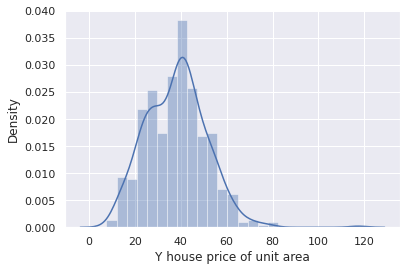

In [ ]:
sns.distplot(data['Y house price of unit area'])

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The above distplot shows the density distribution of the column "Y house price of unit area".

In [ ]:
q = data["Y house price of unit area"].quantile(0.99)
data_1 = data[data['Y house price of unit area']<q]
data_1.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2013.142978,17.628854,1068.495433,4.108696,24.968817,121.533400,37.557510
std,0.281581,11.373619,1239.673459,2.932583,0.012449,0.015037,12.296734
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,8.925000,289.324800,1.000000,24.962990,121.529540,28.400000
50%,2013.167000,16.200000,492.231300,4.000000,24.971100,121.538630,38.400000
75%,2013.417000,27.450000,1455.798000,6.000000,24.978093,121.543100,45.975000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,69.700000


Quantiles give some information about the shape of a distribution - in particular whether a distribution is skewed or not. I used .quantile(0.99) above, .quantile() function takes an array and a number say q between 0 and 1. It returns the value at the qth quantile. So, data_1 consists values that are less than 99th quartile of the original data. Which removes the outliers from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


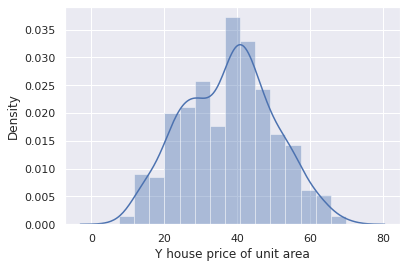

In [ ]:
sns.distplot(data_1['Y house price of unit area'])

The above distplot shows the density distribution of the column "Y house price of unit area". after the values are cleaned we can see a more stable and rise and fall of curves than before


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


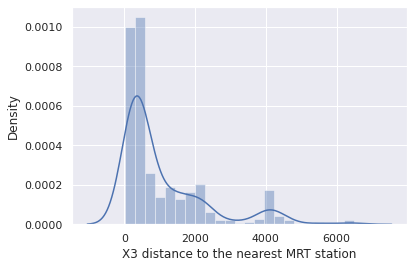

In [ ]:
sns.distplot(data_1['X3 distance to the nearest MRT station'])

Here, I plotted a distplot of the values of distances to the nearest MRT station. The above distplot shows the density distribution and we can find the overall distribution of the data.

In [ ]:
q= data_1['X3 distance to the nearest MRT station'].quantile(0.99)
data_2 = data_1[data_1['X3 distance to the nearest MRT station']<q]
data_2.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2013.141194,17.533000,1011.676814,4.148000,24.969029,121.534016,37.832200
std,0.281176,11.387852,1130.088561,2.927668,0.012360,0.014004,12.106312
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,2012.917000,8.800000,289.324800,1.000000,24.963050,121.529810,28.500000
50%,2013.167000,16.100000,490.113350,4.000000,24.971100,121.538675,38.550000
75%,2013.417000,27.150000,1420.772500,6.000000,24.978380,121.543100,46.100000
max,2013.583000,43.800000,4573.779000,10.000000,25.014590,121.566270,69.700000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


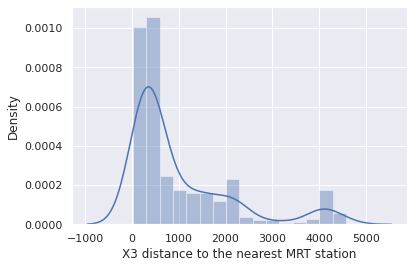

In [ ]:
sns.distplot(data_2['X3 distance to the nearest MRT station'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


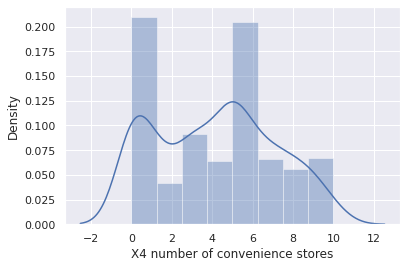

In [ ]:
sns.distplot(data_2['X4 number of convenience stores'])

In [ ]:
data_cleaned = data_2.reset_index(drop=True)

we have set drop = True because reset_index will delete the index instead of inserting it back into the columns of the DataFrame and If we set drop = True , the current index will be deleted entirely and the numeric index will replace it.

In [ ]:
data_cleaned.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2013.141194,17.533000,1011.676814,4.148000,24.969029,121.534016,37.832200
std,0.281176,11.387852,1130.088561,2.927668,0.012360,0.014004,12.106312
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,2012.917000,8.800000,289.324800,1.000000,24.963050,121.529810,28.500000
50%,2013.167000,16.100000,490.113350,4.000000,24.971100,121.538675,38.550000
75%,2013.417000,27.150000,1420.772500,6.000000,24.978380,121.543100,46.100000
max,2013.583000,43.800000,4573.779000,10.000000,25.014590,121.566270,69.700000


**Checking the OLS assumptions**

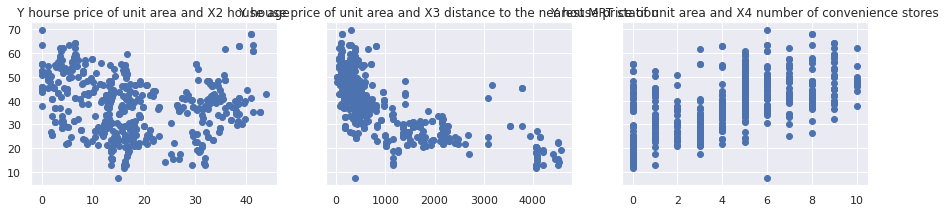

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['X2 house age'],data_cleaned['Y house price of unit area'])
ax1.set_title('Y hourse price of unit area and X2 house age')
ax2.scatter(data_cleaned['X3 distance to the nearest MRT station'],data_cleaned['Y house price of unit area'])
ax2.set_title('Y house price of unit area and X3 distance to the nearest MRT station')
ax3.scatter(data_cleaned['X4 number of convenience stores'],data_cleaned['Y house price of unit area'])
ax3.set_title('Y house price of unit area and X4 number of convenience stores')


plt.show()

The sample taken for the linear regression model must be drawn randomly from the population. The number of observations taken in the sample for making the linear regression model should be greater than the number of parameters to be estimated.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


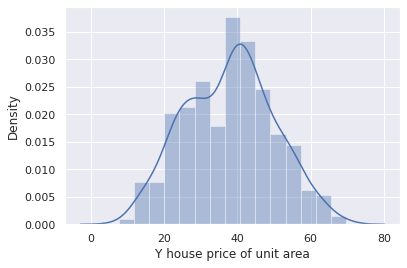

In [ ]:
sns.distplot(data_cleaned['Y house price of unit area'])

**Relaxing the assumptions**

In [ ]:
log_price = np.log(data_cleaned['Y house price of unit area'])

data_cleaned["log_price"] = log_price

data_cleaned

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3.634951
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3.742420
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,3.856510
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,4.003690
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3.763523
...,...,...,...,...,...,...,...,...
495,2013.500,4.9,387.77210,9,24.98118,121.53788,44.7,3.799974
496,2013.333,12.0,1360.13900,1,24.95204,121.54842,28.9,3.363842
497,2013.250,6.5,376.17090,6,24.95418,121.53713,40.9,3.711130
498,2013.500,16.9,4066.58700,0,24.94297,121.50342,20.7,3.030134


OLS estimators minimize the sum of the squared errors (a difference between observed values and predicted values). While OLS is computationally feasible and can be easily used while doing any econometrics test, it is important to know the underlying assumptions of OLS regression. Due to which I used it in my model in order to make the model more accurate.

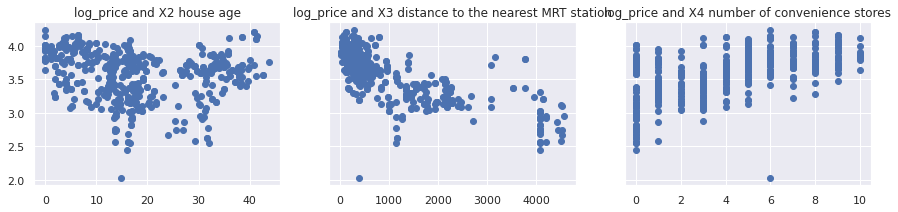

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['X2 house age'],data_cleaned['log_price'])
ax1.set_title('log_price and X2 house age')
ax2.scatter(data_cleaned['X3 distance to the nearest MRT station'],data_cleaned['log_price'])
ax2.set_title('log_price and X3 distance to the nearest MRT station')
ax3.scatter(data_cleaned['X4 number of convenience stores'],data_cleaned['log_price'])
ax3.set_title('log_price and X4 number of convenience stores')


plt.show()

In [ ]:
data_cleaned = data_cleaned.drop(['Y house price of unit area'],axis=1)

**Checking the multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

In [ ]:
vif

,VIF,Features
0,2.708740,X2 house age
1,1.485897,X3 distance to the nearest MRT station
2,2.046144,X4 number of convenience stores


as we know if the VIF is about 1 then there is no correlation, if it is between 2-5 then there is little correlation and if the value is more than 10 then the data is highly correlated.

declaring our taget and input variables

**Train Test Split**

In [ ]:
targets = data_cleaned['log_price']
inputs = data_cleaned.drop(['log_price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

splitting and training the model

# Regression Task and it's accuracy with further analysis:
#5 marks

**Linear Regression Model**

**Create the regression**

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat = reg.predict(x_train)

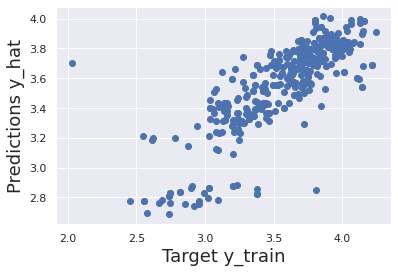

In [ ]:
plt.scatter(y_train,y_hat)

plt.xlabel('Target y_train', size=18)
plt.ylabel('Predictions y_hat', size=18)

plt.show()

Plotting the data of y_train versus our predictions i.e. y_hat 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

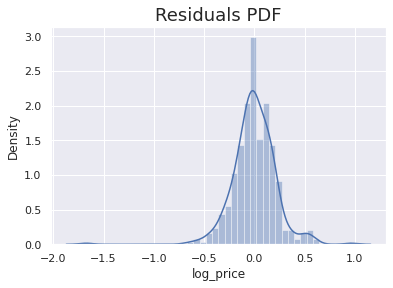

In [ ]:
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

Above is the histogram of the residuals that we had and we can see we had most residuals as 0 which means that the model is very good.

Residuals in a statistical or machine learning model are the differences between observed and predicted values of data.

In [ ]:
reg.score(x_train,y_train)

0.6504070779792648

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(y_train,y_hat))
rmse = (np.sqrt(metrics.mean_squared_error(y_train,y_hat)))

0.04677359579010984


the rmse is 0.04 which means the regression model is very good.

**Finding weight and biases**

In linear regression analysis, bias refers to the error that is introduced by approximating a real-life problem, which may be complicated, by a much simpler model. Though the linear algorithm can introduce bias, it also makes their output easier to understand.

In [ ]:
reg.intercept_

-512.8087152295468

In [ ]:
reg.coef_

array([ 1.22803188e-01, -5.36526681e-03, -1.43526666e-04,  2.76691061e-02,
        6.71717984e+00,  8.35662824e-01])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary["Weights"]= reg.coef_
reg_summary

,Features,Weights
0,X1 transaction date,0.122803
1,X2 house age,-0.005365
2,X3 distance to the nearest MRT station,-0.000144
3,X4 number of convenience stores,0.027669
4,X5 latitude,6.717180
5,X6 longitude,0.835663


Here is the summary of the data, here the weights are the coefficient assigned to a number in a computation

**Testing the Model**

In [ ]:
y_hat_test = reg.predict(x_test)

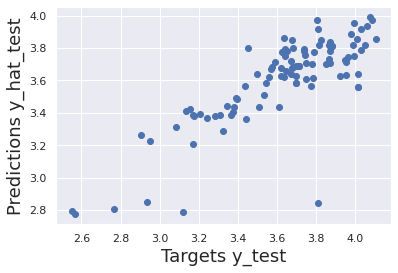

In [ ]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets y_test',size=18)
plt.ylabel('Predictions y_hat_test', size=18)
plt.show()

plotting the predicted values and test values into a scatterplot

In [ ]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,29.373720
1,39.518053
2,39.348271
3,35.116991
4,16.326535


predicting the values using the linear model